# Runge-Kutta 2nd ODE

In [5]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Graficar

In [6]:
def graficar(x_values, y_values):
    plt.plot(x_values, y_values,label='Euler modificado')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Solving ODE using Euler's Method")
    plt.legend()
    plt.grid(True)
    plt.show()

## Euler simple (k0)

In [7]:
def euler_simp_p(f1,f2,xi,yi,ypi):
    ypend = f1(xi,yi,ypi)
    yppend = f2(xi,yi,ypi)
    return ypend,yppend

## Euler modificado (k1)

In [8]:
def euler_modif_p(f1,f2, x, y, yp, h):
    ymit = y + f1(x,y,yp) * h/2
    ypmit = yp + f2(x,y,yp) * h/2
    yppendienteMitad = f2(x+(h/2), ymit, ypmit) #ypmit por completes, pero no nec en este caso
    ypendienteMitad = f1(x+(h/2), ymit, ypmit)  #dude si ypmit o yppend... pero si ypmit por analisis!
    return ypendienteMitad,yppendienteMitad

## Euler modificado adaptado (k2)   1st

In [9]:
def euler_modif_p_k2(f, x, y, h):
    ymit2 = y + euler_modif_p(f,x,y,h) * h/2  # igual es: y + k1  * h/2
    pendienteMitad2 = f(x+(h/2), ymit2)
    return pendienteMitad2

## Para k3     1st

In [10]:
def para_k3(f,x,y,h):
    pend = f(x + h/2 , y + euler_modif_p_k2(f,x,y,h) * h)
    return pend

## Runge-Kutta   1st

In [17]:
def runge_kutta(f1,f2,x,y,yp,h):
    k0y,k0yp = euler_simp_p(f1,f2,x,y,yp)
    k1y,k1yp = euler_modif_p(f1,f2,x,y,yp,h)
    #k2y,k2yp = euler_modif_p_k2(f1,f2,t_values[i-1],x_values[i-1],v_values[i-1],h)
    #k3y,k3yp = para_k3(f1,f2,t_values[i-1],x_values[i-1],v_values[i-1],h)
    ypend = (k0y + 2*k1y + 2*k2y + k3y)/6
    yppend = (k0yp + 2*k1yp + 2*k2yp + k3yp)/6
    return ypend,yppend

## Obtener Valores    1st

In [18]:
def obtenerValores(f1,f2,t0,x0,v0,h,n):
    t_values = np.zeros(n+1);    #x es la var independiente (t)
    x_values = np.zeros(n+1);    #y es la var dependiente (x)
    v_values = np.zeros(n+1);
    t_values[0]=t0  #solo se hacerlo con condiciones iniciales hasta ahora... (no Ec dif con condic de frontera)
    x_values[0]=x0
    v_values[0]=v0
    
    for i in range(1,n+1):
        t_values[i] = t_values[i-1] + h
        xpend,vpend = runge_kutta(f1,f2,t_values[i-1],x_values[i-1],v_values[i-1],h)
        x_values[i] = x_values[i-1] + xpend * h
        v_values[i] = v_values[i-1] + vpend * h
    
    return t_values,x_values,v_values

## Main

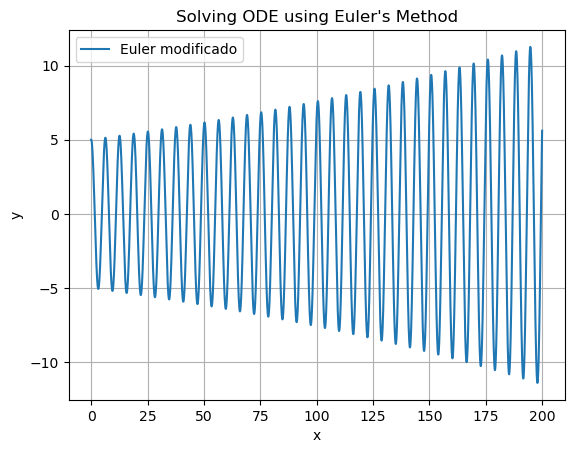

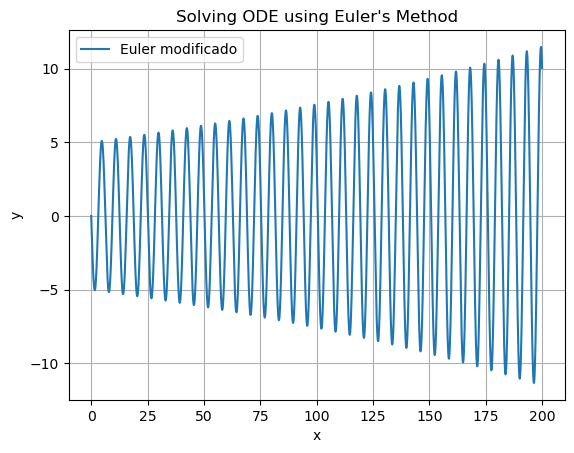

In [20]:
#Valores - Parametros - Condiciones
t0 = 0    #TODAVIA NO SE como resolver SI lo que TENGO son CONDICIONES DE FRONTERA... (solo si se si tengo condic iniciales)
x0 = 5    
v0 = 0     
k = .2
m = .2
h = .025
n = 8000

#Funcion
def f1(t,x,v):     #x punto = V
    return v
def f2(t,x,v):       #v punto   #PROGRAMA NO SOPORTA QUE f2 dependa de x punto/vel
    return -(k/m)*x


# Resolver
t_values, x_values, v_values = obtenerValores(f1, f2, t0, x0, v0, h, n)  #faltan los v_values... que se vayan guardando (siento que casi solo me enrrende y en realidad si nec primero obt p, aunque no, porque en met mas comp, creo nec mandar x(pos, no t en este caso) de en medio y justo no la tienes!)

# Plot the solution
#label = 'ODE Euler Modificado'
graficar(t_values, x_values)
graficar(t_values, v_values)

## Grafica y Analisis del error

In [25]:
meanAbsoluteErrorList = []   #solo correrlo al inicio

In [26]:
def valorDeFuncion(x,k,m):
    valor = 5*np.cos(x*np.sqrt(k/m)) #w = k/m
    return valor

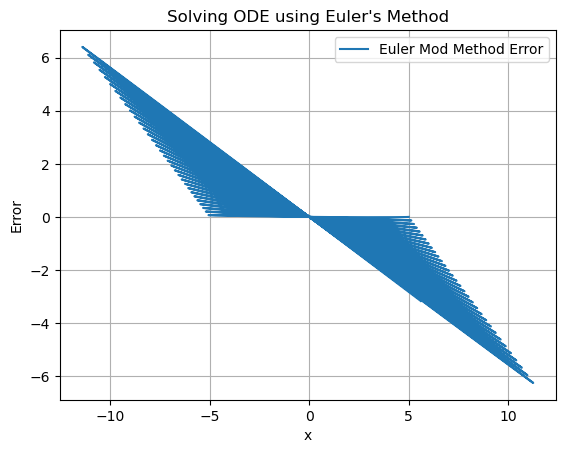

In [27]:
#Grafica del error en func de x
k =.2
m = .2
listRealValues = []
listErrors = []
for i in range (0,n+1):
    #print(x_values[i])
    #print(y_values[i])
    valorReal = valorDeFuncion(t_values[i],k,m)
    listRealValues.append(valorReal)
    listErrors.append(valorReal-x_values[i])
#print(listRealValues)
arrayRealValues = np.array(listRealValues)
#print(arrayRealValues)
arrayErrorValues = np.array(listErrors)
#print(arrayErrorValues)

# Plot the solution
plt.plot(x_values, arrayErrorValues, label='Euler Mod Method Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title("Solving ODE using Euler's Method")
plt.legend()
plt.grid(True)
plt.show()

#Mean Absolute Error
meanAbsoluteError = np.mean(np.abs(arrayErrorValues))
meanAbsoluteErrorList.append(meanAbsoluteError)



In [28]:
print(meanAbsoluteErrorList)

[1.7800414808994676]


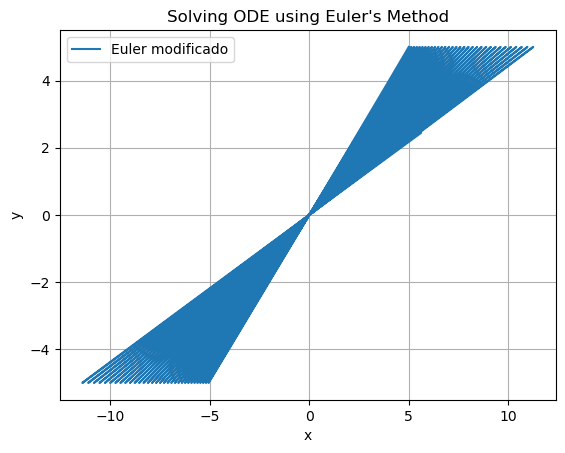

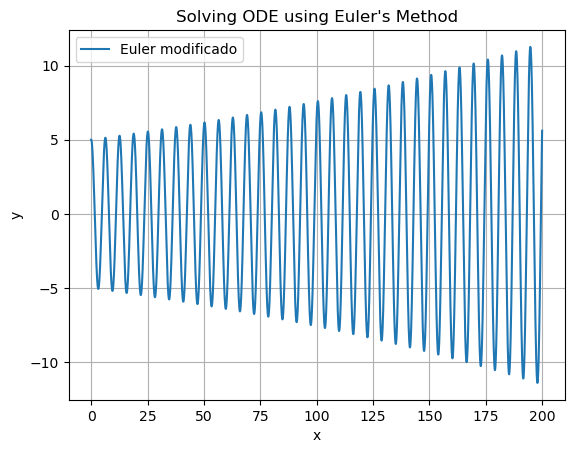

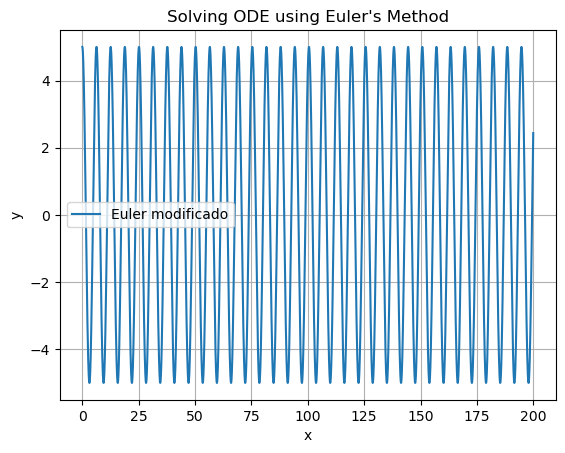

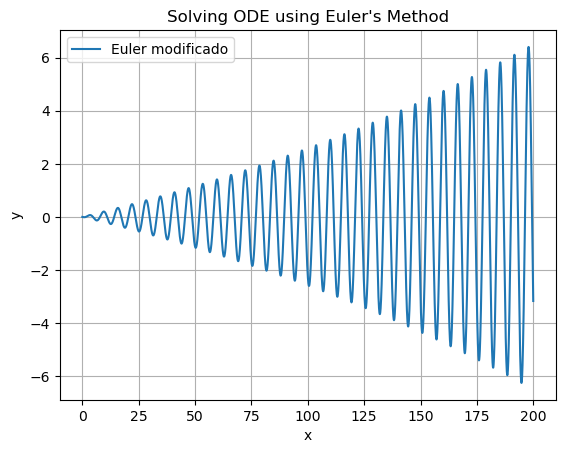

In [29]:
graficar(x_values, arrayRealValues) #se ve el error. Ideal linea recta pendiente 1
graficar(t_values, x_values)
graficar(t_values,arrayRealValues)
graficar(t_values, arrayErrorValues)


## Extra 

### Error curioso que estaba haciendo en los siguientes dos cuadros

In [12]:
def euler_modif_p_x(f1,f2, x, y, yp):
    ymit = y + f1(x,y,yp) * h/2  #f1 = yp = v anterior
    #pendienteMitad = f2(x+(h/2), ymit) #no soporta que f2 dep de yp, no tiene forma de saber ypmit! (seria creo ciclica...)
    pendienteMitad = f1(x+(h/2), ymit, ypmit) #no tengo ypmit aun!  (f1 aparte solo regresaria ypmit!!!)
    return pendienteMitad

In [13]:
def euler_modif_p_v(f1,f2, x, y, yp):
    ypmit = yp + f2(x,y) * h/2 
    pendienteMitad = f2(x+(h/2), ymit) #pero aun no tengo ymit!!!(seria creo ciclica...)
    return pendienteMitad